In [59]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [60]:
def load_and_preprocess_data():
    # Load the dataset
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Normalize pixel values
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255

    # Convert class vectors to binary class matrices
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return x_train, y_train, x_test, y_test


In [61]:
def create_augmentation():
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True
    )
    return datagen


In [62]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model


In [63]:
# Load and preprocess data
x_train, y_train, x_test, y_test = load_and_preprocess_data()


In [64]:
# Create and compile the model
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
# Optional: Data augmentation
datagen = create_augmentation()
datagen.fit(x_train)

In [66]:
# Model checkpoints and early stopping
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
early_stop = EarlyStopping(patience=10)

In [67]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), 
                    epochs=50, 
                    validation_data=(x_test, y_test), 
                    callbacks=[checkpoint, early_stop])


Epoch 1/50


1563/1563 [==============================] - 8s 5ms/step - loss: 1.7451 - accuracy: 0.3525 - val_loss: 1.3785 - val_accuracy: 0.5049
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4804 - accuracy: 0.4628 - val_loss: 1.3083 - val_accuracy: 0.5359
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3677 - accuracy: 0.5090 - val_loss: 1.2128 - val_accuracy: 0.5708
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2962 - accuracy: 0.5326 - val_loss: 1.1235 - val_accuracy: 0.6020
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2451 - accuracy: 0.5550 - val_loss: 1.2567 - val_accuracy: 0.5755
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1932 - accuracy: 0.5751 - val_loss: 1.0552 - val_accuracy: 0.6229
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1548 - accuracy: 0.5905 - val_loss: 0.9935 - val_accuracy: 0.6496
Epo

In [68]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

313/313 [==============================] - 0s 743us/step - loss: 0.7694 - accuracy: 0.7461
Test accuracy: 0.7461000084877014, Test loss: 0.7693812251091003


313/313 [==============================] - 0s 714us/step - loss: 0.7694 - accuracy: 0.7461
Test accuracy: 0.7461000084877014, Test loss: 0.7693812251091003


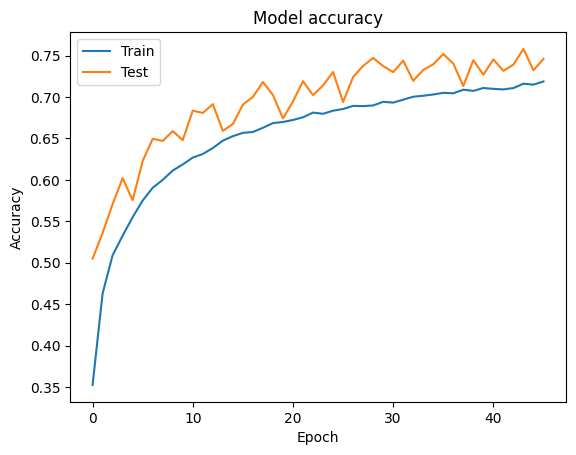

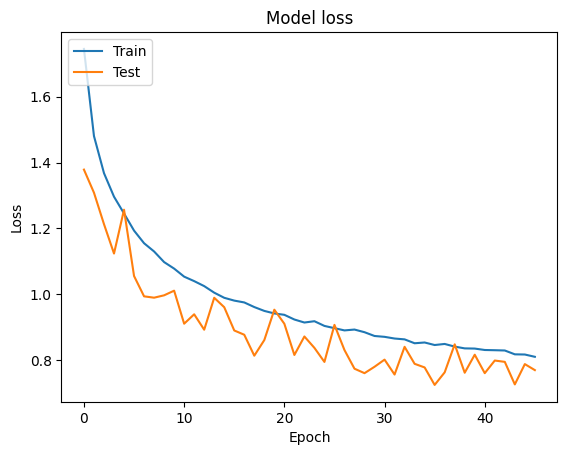

In [69]:
# Check if history object is created
if history is not None:
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
else:
    print("Training did not complete successfully. No history object was created.")